In [1]:
from collections import Counter
import ast
import re
import matplotlib.pyplot as plt


# Define a hashable dictionary class
class hashabledict(dict):
    def __hash__(self):
        return hash(tuple(sorted(self.items())))

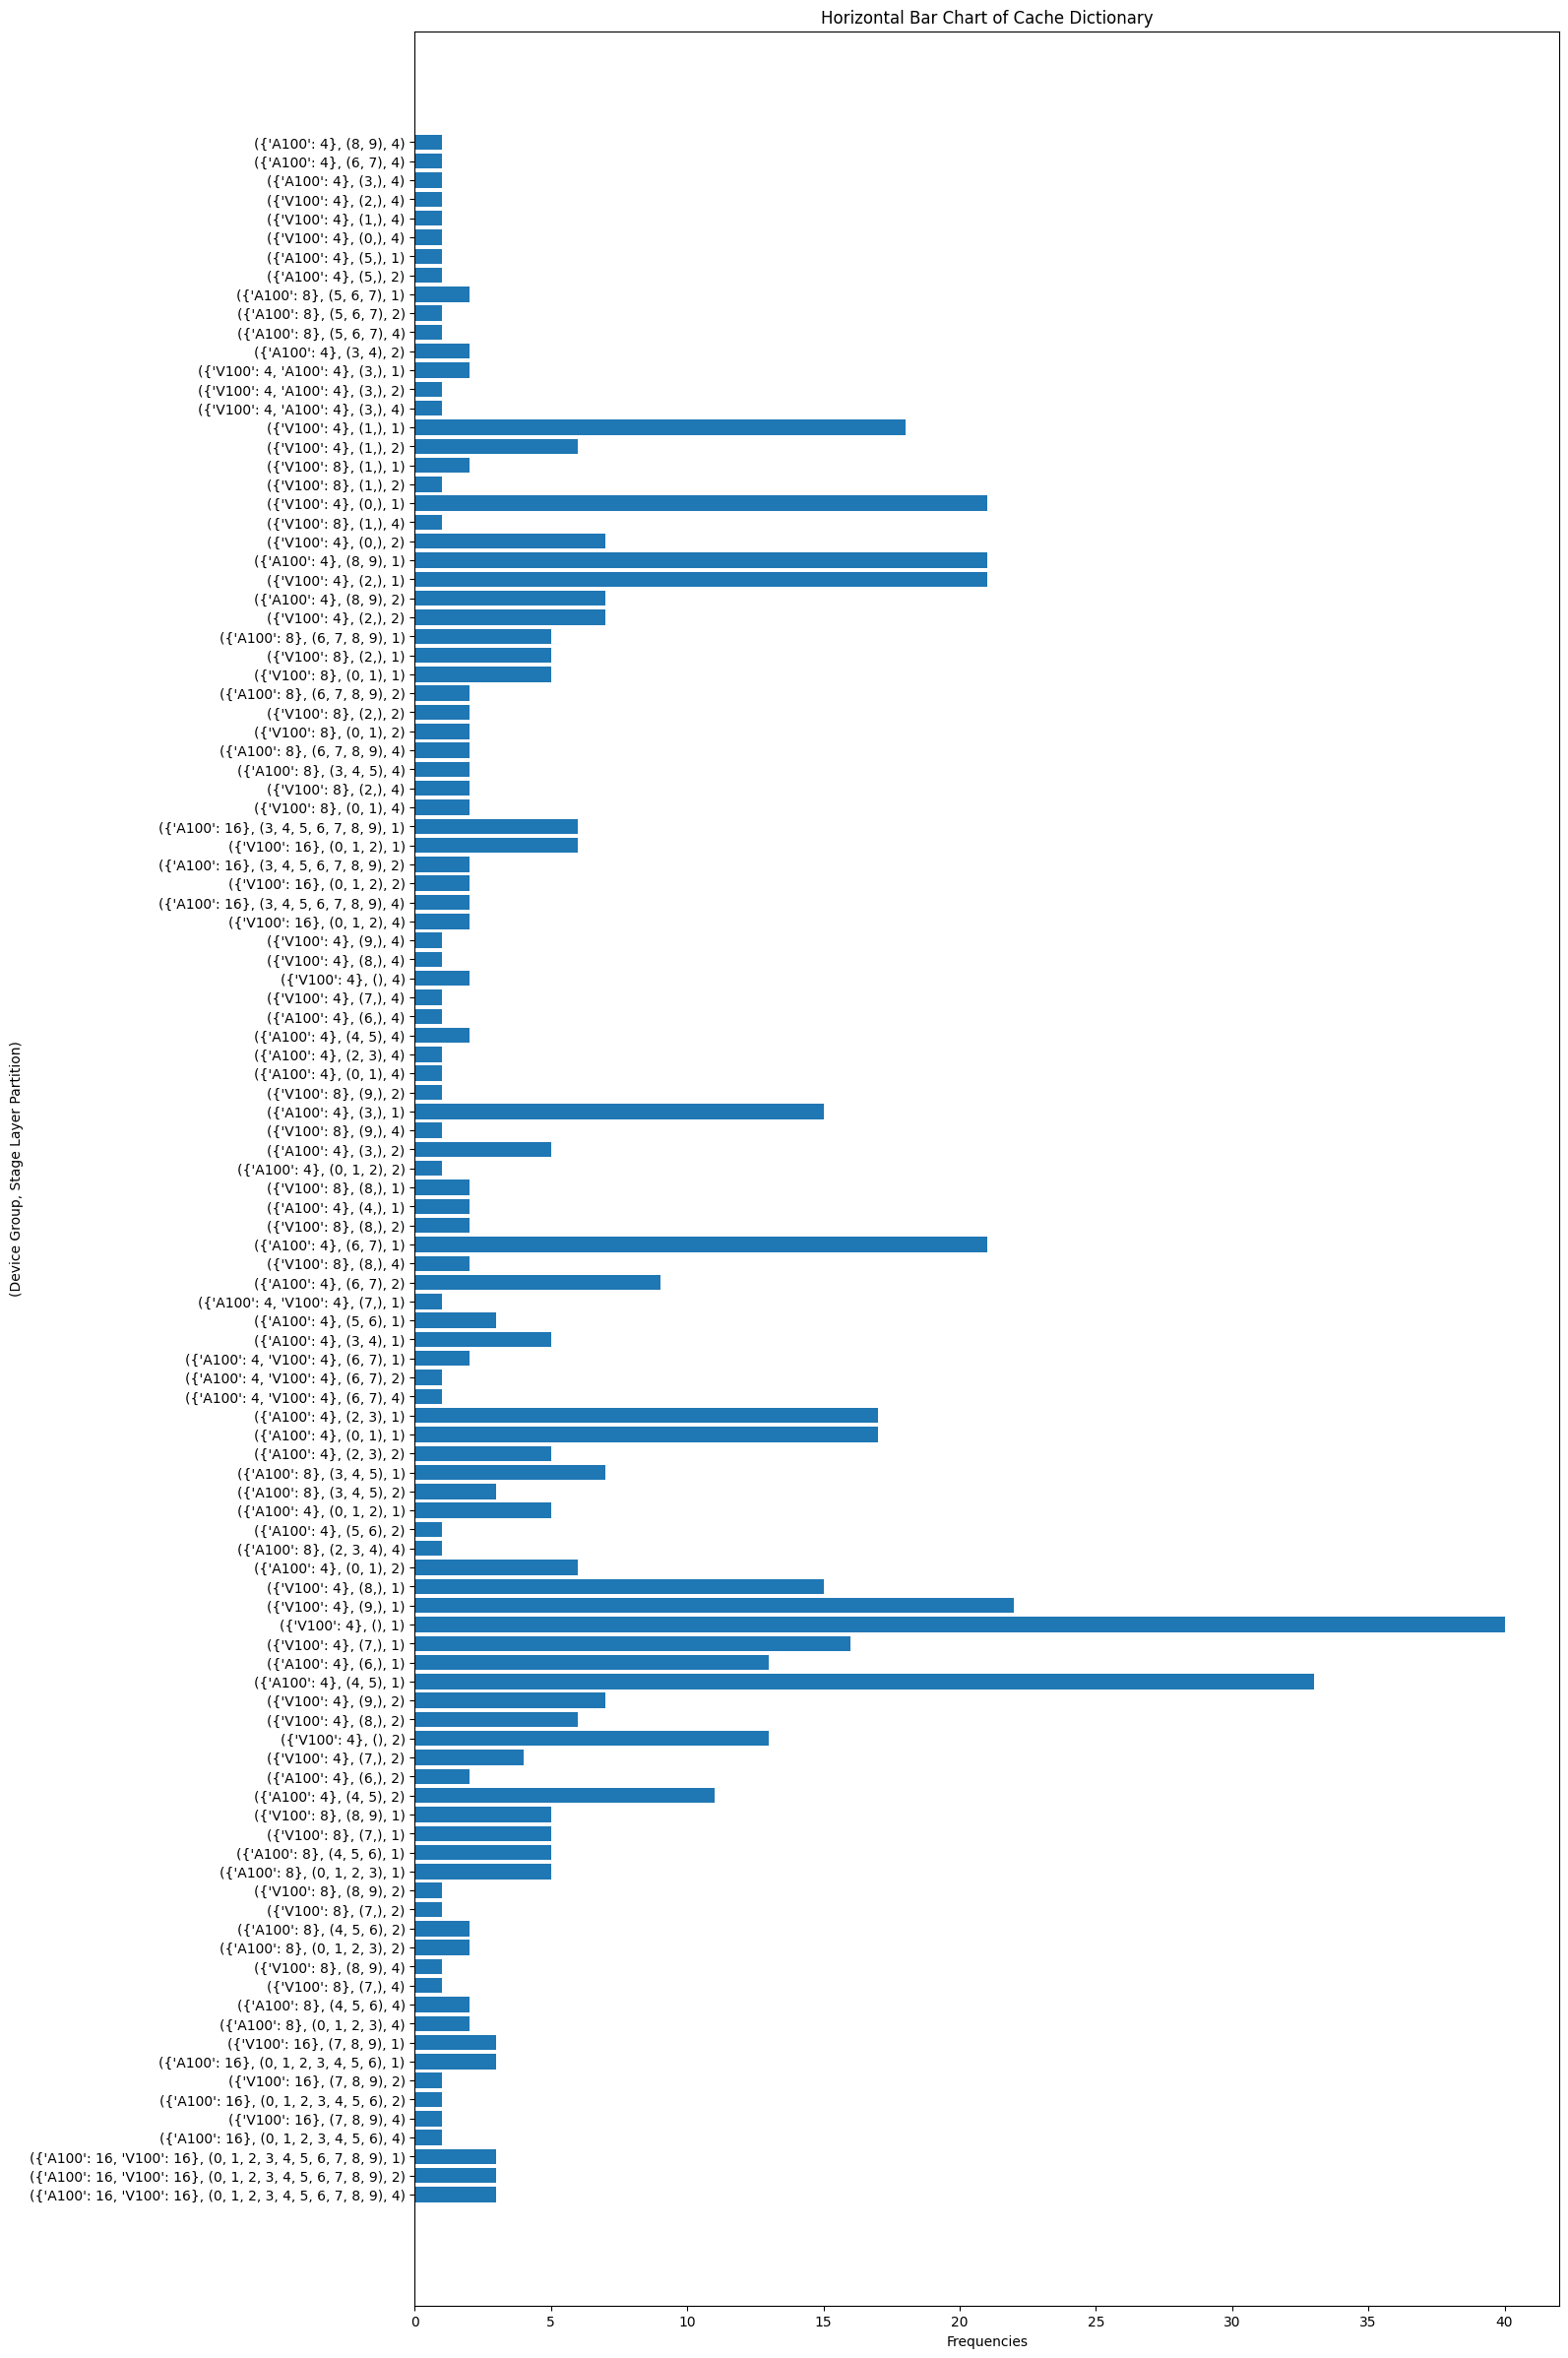

In [7]:
# Parse the cache string into a dictionary using ast.literal_eval for safety
# Replace dictionary syntax with hashabledict where necessary for the keys
cache = {(('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), 4): 3, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), 2): 3, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9), 1): 3, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4, 5, 6), 4): 1, (('V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (7, 8, 9), 4): 1, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4, 5, 6), 2): 1, (('V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (7, 8, 9), 2): 1, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3, 4, 5, 6), 1): 3, (('V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (7, 8, 9), 1): 3, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3), 4): 2, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (4, 5, 6), 4): 2, (('V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (7,), 4): 1, (('V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (8, 9), 4): 1, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3), 2): 2, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (4, 5, 6), 2): 2, (('V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (7,), 2): 1, (('V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (8, 9), 2): 1, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (0, 1, 2, 3), 1): 5, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (4, 5, 6), 1): 5, (('V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (7,), 1): 5, (('V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (8, 9), 1): 5, (('A100', 'A100', 'A100', 'A100'), (4, 5), 2): 11, (('A100', 'A100', 'A100', 'A100'), (6,), 2): 2, (('V100', 'V100', 'V100', 'V100'), (7,), 2): 4, (('V100', 'V100', 'V100', 'V100'), (), 2): 13, (('V100', 'V100', 'V100', 'V100'), (8,), 2): 6, (('V100', 'V100', 'V100', 'V100'), (9,), 2): 7, (('A100', 'A100', 'A100', 'A100'), (4, 5), 1): 33, (('A100', 'A100', 'A100', 'A100'), (6,), 1): 13, (('V100', 'V100', 'V100', 'V100'), (7,), 1): 16, (('V100', 'V100', 'V100', 'V100'), (), 1): 40, (('V100', 'V100', 'V100', 'V100'), (9,), 1): 22, (('V100', 'V100', 'V100', 'V100'), (8,), 1): 15, (('A100', 'A100', 'A100', 'A100'), (0, 1), 2): 6, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (2, 3, 4), 4): 1, (('A100', 'A100', 'A100', 'A100'), (5, 6), 2): 1, (('A100', 'A100', 'A100', 'A100'), (0, 1, 2), 1): 5, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (3, 4, 5), 2): 3, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (3, 4, 5), 1): 7, (('A100', 'A100', 'A100', 'A100'), (2, 3), 2): 5, (('A100', 'A100', 'A100', 'A100'), (0, 1), 1): 17, (('A100', 'A100', 'A100', 'A100'), (2, 3), 1): 17, (('A100', 'A100', 'A100', 'A100', 'V100', 'V100', 'V100', 'V100'), (6, 7), 4): 1, (('A100', 'A100', 'A100', 'A100', 'V100', 'V100', 'V100', 'V100'), (6, 7), 2): 1, (('A100', 'A100', 'A100', 'A100', 'V100', 'V100', 'V100', 'V100'), (6, 7), 1): 2, (('A100', 'A100', 'A100', 'A100'), (3, 4), 1): 5, (('A100', 'A100', 'A100', 'A100'), (5, 6), 1): 3, (('A100', 'A100', 'A100', 'A100', 'V100', 'V100', 'V100', 'V100'), (7,), 1): 1, (('A100', 'A100', 'A100', 'A100'), (6, 7), 2): 9, (('V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (8,), 4): 2, (('A100', 'A100', 'A100', 'A100'), (6, 7), 1): 21, (('V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (8,), 2): 2, (('A100', 'A100', 'A100', 'A100'), (4,), 1): 2, (('V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (8,), 1): 2, (('A100', 'A100', 'A100', 'A100'), (0, 1, 2), 2): 1, (('A100', 'A100', 'A100', 'A100'), (3,), 2): 5, (('V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (9,), 4): 1, (('A100', 'A100', 'A100', 'A100'), (3,), 1): 15, (('V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (9,), 2): 1, (('A100', 'A100', 'A100', 'A100'), (0, 1), 4): 1, (('A100', 'A100', 'A100', 'A100'), (2, 3), 4): 1, (('A100', 'A100', 'A100', 'A100'), (4, 5), 4): 2, (('A100', 'A100', 'A100', 'A100'), (6,), 4): 1, (('V100', 'V100', 'V100', 'V100'), (7,), 4): 1, (('V100', 'V100', 'V100', 'V100'), (), 4): 2, (('V100', 'V100', 'V100', 'V100'), (8,), 4): 1, (('V100', 'V100', 'V100', 'V100'), (9,), 4): 1, (('V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (0, 1, 2), 4): 2, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (3, 4, 5, 6, 7, 8, 9), 4): 2, (('V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (0, 1, 2), 2): 2, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (3, 4, 5, 6, 7, 8, 9), 2): 2, (('V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (0, 1, 2), 1): 6, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (3, 4, 5, 6, 7, 8, 9), 1): 6, (('V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (0, 1), 4): 2, (('V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (2,), 4): 2, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (3, 4, 5), 4): 2, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (6, 7, 8, 9), 4): 2, (('V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (0, 1), 2): 2, (('V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (2,), 2): 2, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (6, 7, 8, 9), 2): 2, (('V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (0, 1), 1): 5, (('V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (2,), 1): 5, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (6, 7, 8, 9), 1): 5, (('V100', 'V100', 'V100', 'V100'), (2,), 2): 7, (('A100', 'A100', 'A100', 'A100'), (8, 9), 2): 7, (('V100', 'V100', 'V100', 'V100'), (2,), 1): 21, (('A100', 'A100', 'A100', 'A100'), (8, 9), 1): 21, (('V100', 'V100', 'V100', 'V100'), (0,), 2): 7, (('V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (1,), 4): 1, (('V100', 'V100', 'V100', 'V100'), (0,), 1): 21, (('V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (1,), 2): 1, (('V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100', 'V100'), (1,), 1): 2, (('V100', 'V100', 'V100', 'V100'), (1,), 2): 6, (('V100', 'V100', 'V100', 'V100'), (1,), 1): 18, (('V100', 'V100', 'V100', 'V100', 'A100', 'A100', 'A100', 'A100'), (3,), 4): 1, (('V100', 'V100', 'V100', 'V100', 'A100', 'A100', 'A100', 'A100'), (3,), 2): 1, (('V100', 'V100', 'V100', 'V100', 'A100', 'A100', 'A100', 'A100'), (3,), 1): 2, (('A100', 'A100', 'A100', 'A100'), (3, 4), 2): 2, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7), 4): 1, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7), 2): 1, (('A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100', 'A100'), (5, 6, 7), 1): 2, (('A100', 'A100', 'A100', 'A100'), (5,), 2): 1, (('A100', 'A100', 'A100', 'A100'), (5,), 1): 1, (('V100', 'V100', 'V100', 'V100'), (0,), 4): 1, (('V100', 'V100', 'V100', 'V100'), (1,), 4): 1, (('V100', 'V100', 'V100', 'V100'), (2,), 4): 1, (('A100', 'A100', 'A100', 'A100'), (3,), 4): 1, (('A100', 'A100', 'A100', 'A100'), (6, 7), 4): 1, (('A100', 'A100', 'A100', 'A100'), (8, 9), 4): 1}
cache_dict = {}
for key, value in cache.items():
    cache_dict[(hashabledict(dict(Counter(tuple(key[0])))), key[1], key[2])] = value

# Extract keys and values from the dictionary
keys = list(cache_dict.keys())
values = list(cache_dict.values())

# Create a horizontal bar chart
plt.figure(figsize=(15, 30))
plt.barh(range(len(keys)), values, tick_label=[str(k) for k in keys])
plt.yticks(rotation=0)
plt.ylabel('(Device Group, Stage Layer Partition)')
plt.xlabel('Frequencies')
plt.title('Horizontal Bar Chart of Cache Dictionary')
plt.show()